In [1]:
import numpy as np
import os.path as op
%matplotlib inline

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [3]:
import skimage.io as sio

In [4]:
import pandas as pd

In [5]:
def load_cells_data():
    train_files = pd.read_csv('../../data/cells/train.txt',  header=None, delimiter=' ')
    test_files = pd.read_csv('../../data/cells/test.txt', header=None, delimiter=' ')
    
    y_train = train_files[1]
    y_test = test_files[1]
    X_train = np.empty((y_train.shape[0], 256, 256, 3))
    X_test = np.empty((y_test.shape[0], 256, 256, 3))

    for ii, fname in enumerate(train_files[0]):
        X_train[ii] = sio.imread(op.join('..', '..', 'data', 'cells', op.split(fname)[-1]))

    for ii, fname in enumerate(test_files[0]):
        X_test[ii] = sio.imread(op.join('..', '..', 'data', 'cells', op.split(fname)[-1]))
        
    return (X_train, y_train), (X_test, y_test)

In [6]:
batch_size = 20
nb_classes = 3
nb_epoch = 12

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [7]:
(X_train, y_train), (X_test, y_test) = load_cells_data()

In [8]:
input_shape = X_train.shape[1:]

In [9]:
# input image dimensions
img_rows, img_cols, img_channels = X_train.shape[1:]

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (760, 256, 256, 3)
760 train samples
84 test samples


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

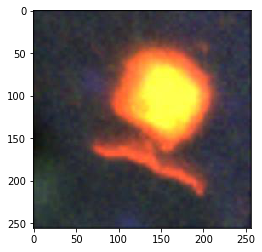

In [12]:
plt.imshow(X_train[0])

In [13]:
y_train[0]

2

In [14]:
# convert class vectors to binary class matrices ("one-hot encoding")
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [15]:
Y_train[0]

array([ 0.,  0.,  1.])

In [16]:
model = Sequential()
model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 760 samples, validate on 84 samples
Epoch 1/12
720/760 [===========================>..] - ETA: 13s - loss: 1.5005 - acc: 0.6139 